In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [17]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_train
x_train_scaled = x_train/255
x_test_scaled = x_test/255

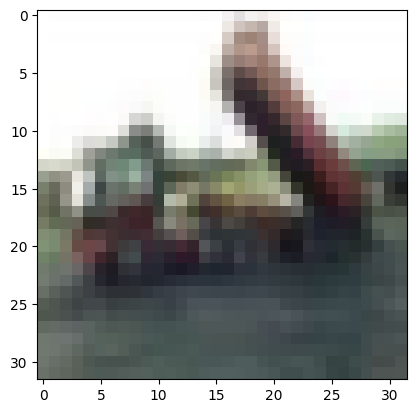

In [21]:
plt.imshow(x_train[2])

In [27]:
y_train_categorical = tf.keras.utils.to_categorical(y_train,num_classes =10,dtype ='float32')
y_test_categorical = tf.keras.utils.to_categorical(y_test,num_classes=10,dtype ='float32')

In [28]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000,activation='relu'),
     tf.keras.layers.Dense(2000,activation='relu'),
    tf.keras.layers.Dense(1000,activation='relu'),
     tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid'),
])
model.compile(
 optimizer = 'SGD',
 loss = 'categorical_crossentropy',
 metrics = ['accuracy'],
)
model.fit(x_train_scaled,y_train_categorical,epochs =10)

Epoch 1/10
1563/1563 [==============================] - 95s 60ms/step - loss: 1.8207 - accuracy: 0.3446
Epoch 2/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.6132 - accuracy: 0.4241
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5217 - accuracy: 0.4577
Epoch 4/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4561 - accuracy: 0.4836
Epoch 5/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3988 - accuracy: 0.5013
Epoch 6/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3503 - accuracy: 0.5213
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3063 - accuracy: 0.5386
Epoch 8/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2654 - accuracy: 0.5526
Epoch 9/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2254 - accuracy: 0.5651
Epoch 10/10
1563/1563 [==============================] - 96s 61m

In [58]:
prediction = model.predict(x_test_scaled)


313/313 [==============================] - 8s 26ms/step


In [61]:
data_predict = [np.argmax(i) for i in prediction]
cm = tf.math.confusion_matrix(y_test,data_predict)
print(classification_report(y_test,data_predict))
cm


              precision    recall  f1-score   support

           0       0.51      0.71      0.59      1000
           1       0.73      0.52      0.61      1000
           2       0.55      0.21      0.31      1000
           3       0.37      0.32      0.35      1000
           4       0.43      0.53      0.48      1000
           5       0.42      0.48      0.45      1000
           6       0.60      0.54      0.57      1000
           7       0.50      0.70      0.58      1000
           8       0.82      0.42      0.55      1000
           9       0.49      0.72      0.58      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.51     10000
weighted avg       0.54      0.51      0.51     10000



<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[707,  14,  18,  14,  32,  25,  15,  68,  34,  73],
       [ 76, 518,   5,  21,   5,  15,  13,  39,  18, 290],
       [102,  13, 212,  99, 227, 108,  83, 123,   6,  27],
       [ 47,   9,  30, 322,  74, 262,  95,  87,   7,  67],
       [ 60,   8,  46,  57, 533,  56,  78, 131,   6,  25],
       [ 33,   4,  30, 173,  82, 477,  43, 119,  10,  29],
       [ 26,   6,  25,  97, 167,  62, 535,  42,   5,  35],
       [ 33,   6,  14,  36,  77,  76,  12, 697,   1,  48],
       [255,  46,   4,  23,  24,  31,   6,  42, 419, 150],
       [ 61,  81,   2,  24,  16,  25,  10,  58,   6, 717]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

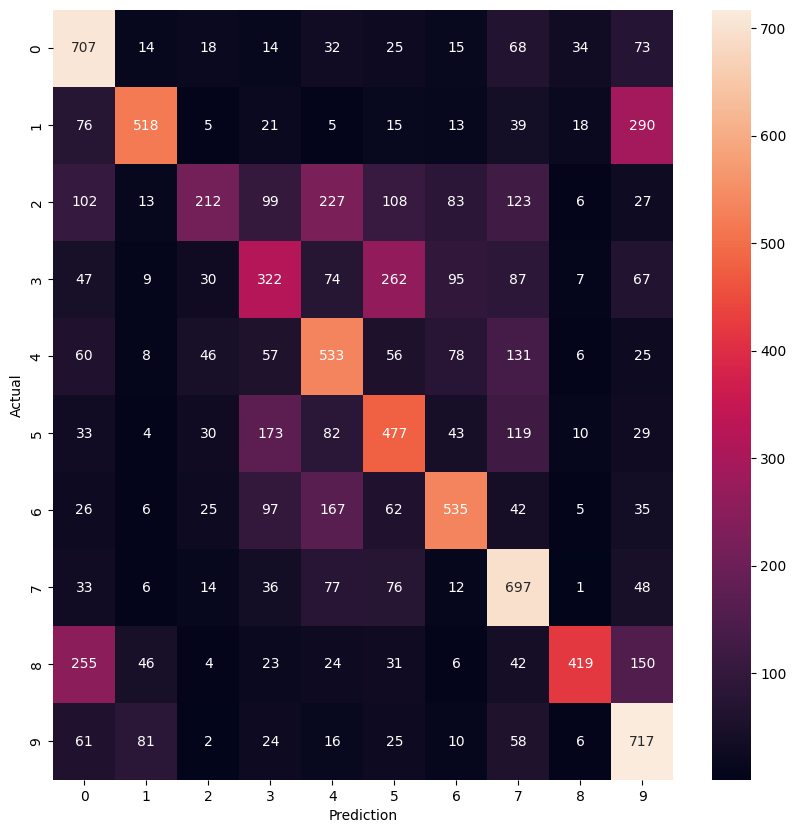

In [44]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [45]:
#Using CNN 

In [51]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3000,activation='relu'),
     tf.keras.layers.Dense(2000,activation='relu'),
    tf.keras.layers.Dense(1000,activation='relu'),
     tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_cnn.compile(
 optimizer = 'adam',
 loss = 'categorical_crossentropy',
 metrics = ['accuracy'],
)
model_cnn.fit(x_train_scaled,y_train_categorical,epochs =10)

Epoch 1/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.8499 - accuracy: 0.2761
Epoch 2/10
1563/1563 [==============================] - 218s 139ms/step - loss: 1.3912 - accuracy: 0.4909
Epoch 3/10
1563/1563 [==============================] - 237s 152ms/step - loss: 1.2329 - accuracy: 0.5546
Epoch 4/10
1563/1563 [==============================] - 246s 157ms/step - loss: 1.1367 - accuracy: 0.5907
Epoch 5/10
1563/1563 [==============================] - 248s 159ms/step - loss: 1.0565 - accuracy: 0.6218
Epoch 6/10
1563/1563 [==============================] - 240s 154ms/step - loss: 0.9885 - accuracy: 0.6473
Epoch 7/10
1563/1563 [==============================] - 278s 178ms/step - loss: 0.9235 - accuracy: 0.6696
Epoch 8/10
1563/1563 [==============================] - 291s 186ms/step - loss: 0.8729 - accuracy: 0.6927
Epoch 9/10
1563/1563 [==============================] - 258s 165ms/step - loss: 0.8263 - accuracy: 0.7077
Epoch 10/10
1563/1563 [=======================

In [57]:
prediction_cnn = model_cnn.predict(x_test_scaled)


313/313 [==============================] - 11s 36ms/step


In [60]:
data_predict_cnn = [np.argmax(i) for i in prediction_cnn]
cm_cnn = tf.math.confusion_matrix(y_test,data_predict_cnn)
from sklearn.metrics import classification_report
print(classification_report(y_test,data_predict_cnn))
cm_cnn

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.88      0.77      0.82      1000
           2       0.65      0.44      0.52      1000
           3       0.42      0.56      0.48      1000
           4       0.61      0.69      0.65      1000
           5       0.58      0.59      0.59      1000
           6       0.72      0.78      0.75      1000
           7       0.76      0.68      0.72      1000
           8       0.80      0.75      0.77      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[727,  11,  61,  42,  29,   8,   9,  13,  74,  26],
       [ 30, 772,   4,  19,   5,   5,  24,   5,  17, 119],
       [ 71,   4, 441, 151, 118,  76,  88,  33,  13,   5],
       [ 13,   5,  40, 560,  62, 179,  85,  30,  12,  14],
       [ 12,   1,  38, 104, 693,  33,  49,  59,  11,   0],
       [  8,   0,  21, 233,  67, 593,  24,  44,   2,   8],
       [  5,   1,  37,  98,  48,  14, 782,   7,   7,   1],
       [ 11,   0,  21,  70, 103,  92,   8, 681,   4,  10],
       [115,  29,   8,  45,   7,   9,   5,   3, 750,  29],
       [ 27,  50,  10,  25,   7,  10,   8,  22,  51, 790]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

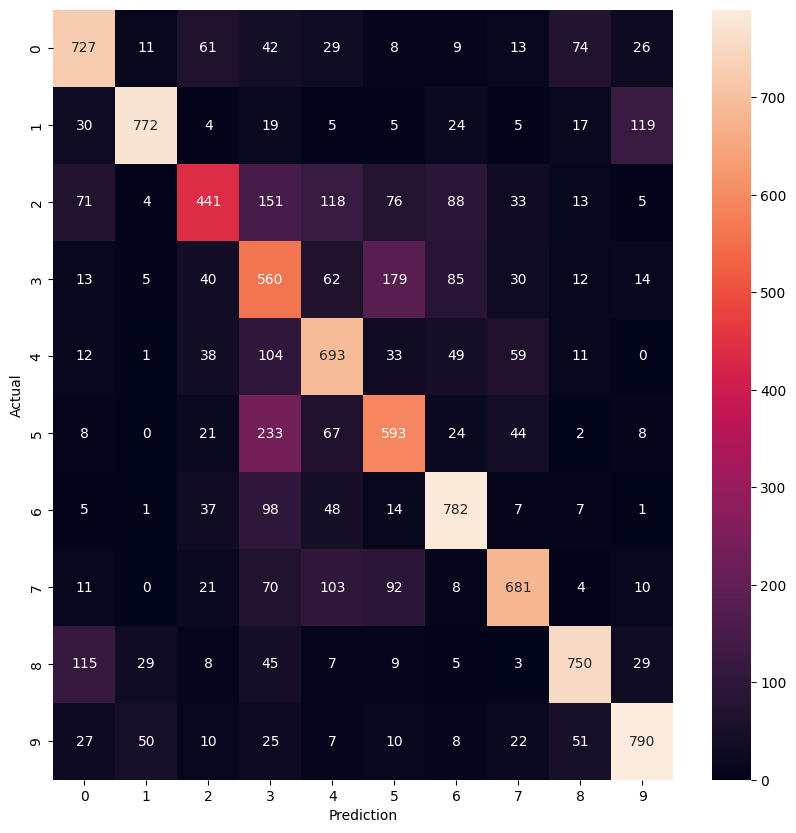

In [54]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm_cnn,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')